### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Шалыгин Георгий
##### Группа:   НФИ-02

## Москва 2023
***

### Вариант № 18

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.
 Набор данных stl10 

In [2]:
#!pip install -q tfds-nightly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

In [3]:
ds = tfds.load("stl10", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((5000, 2), (8000, 2))

In [4]:
df_train.head()

,image,label
0,"[[[136, 144, 153], [125, 127, 136], [125, 126,...",1
1,"[[[70, 132, 186], [81, 139, 189], [143, 176, 2...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",8
3,"[[[104, 90, 69], [101, 87, 66], [103, 88, 67],...",3
4,"[[[189, 204, 235], [189, 204, 235], [189, 204,...",9


In [5]:
df_train.iloc[0]['image'].shape

(96, 96, 3)

In [6]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images.shape, test_images.shape

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))
    
train_images /= 255
test_images /= 255

train_images.shape, test_images.shape

((5000, 96, 96, 3), (8000, 96, 96, 3))

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.


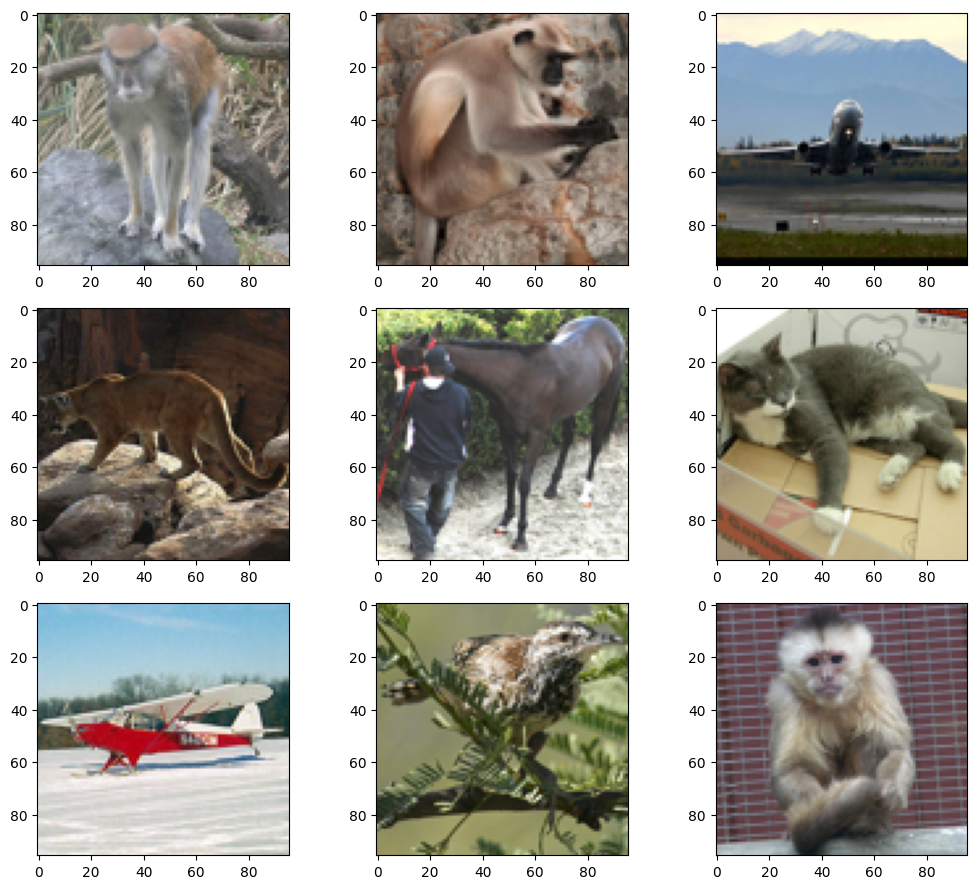

In [7]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    
    num_row = 3
    num_col = 3 

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i] 
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

plot_random_sample(test_images)

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению).  

 Классы с метками 1,3,5 

In [8]:
df_train['label'].unique()

array([1, 0, 8, 3, 9, 2, 4, 6, 7, 5])

In [9]:
df_train1 = df_train[df_train['label'].isin([1, 3])]
df_test1 = df_test[df_test['label'].isin([1, 3])]
df_train1.loc[df_train1['label'] == 3,'label'] = 0
df_test1.loc[df_test1['label'] == 3,'label'] = 0

df_train1.shape, df_test1.shape

((1000, 2), (1600, 2))

In [14]:
train_labels = df_train1['label'].to_numpy(dtype=np.float32)
test_labels = df_test1['label'].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train1.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test1.shape[0],96,96,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train1.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test1.iloc[idx]['image']))
    
train_images /= 255
test_images /= 255

train_images.shape, test_images.shape

((1000, 96, 96, 3), (1600, 96, 96, 3))

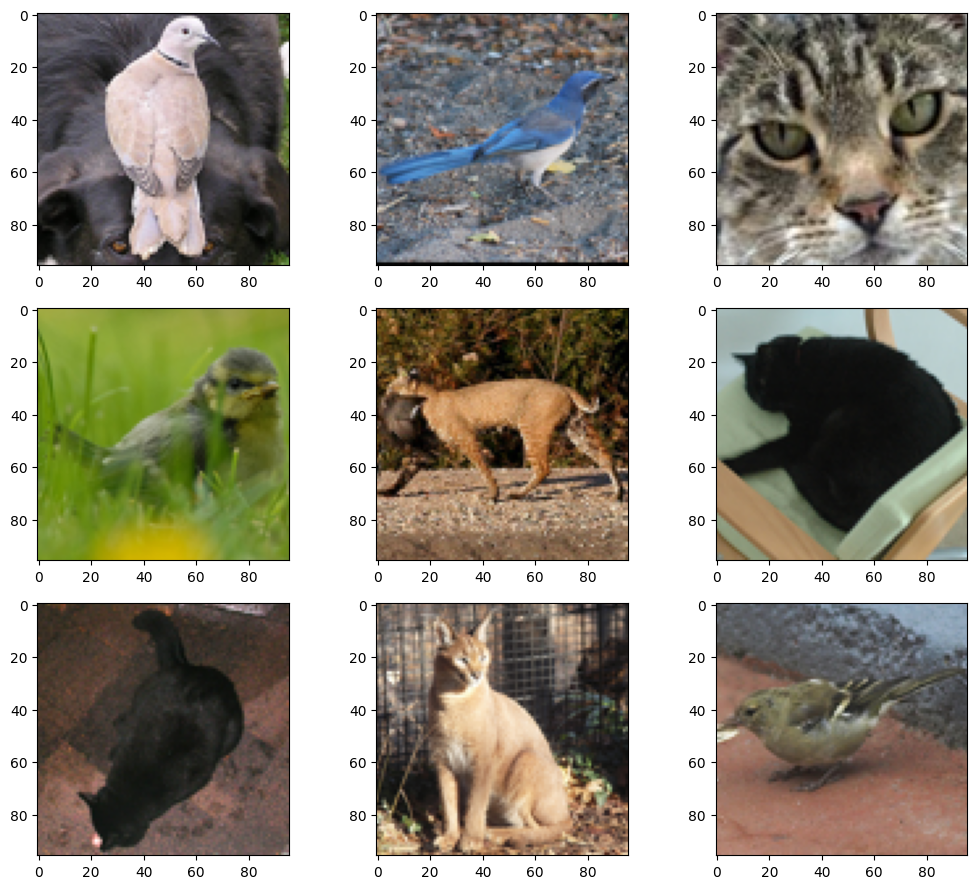

In [15]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    
    num_row = 3
    num_col = 3 

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i] 
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

plot_random_sample(test_images)

In [17]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss='bce',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=256,
    validation_data=(test_images, test_labels)
)

Epoch 1/50
4/4 [==============================] - 2s 196ms/step - loss: 1.5018 - accuracy: 0.5020 - val_loss: 0.6648 - val_accuracy: 0.5875
Epoch 2/50
4/4 [==============================] - 0s 75ms/step - loss: 0.9959 - accuracy: 0.5320 - val_loss: 0.7154 - val_accuracy: 0.5206
Epoch 3/50
4/4 [==============================] - 0s 75ms/step - loss: 0.7851 - accuracy: 0.5010 - val_loss: 0.8570 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 78ms/step - loss: 0.7213 - accuracy: 0.5600 - val_loss: 0.7212 - val_accuracy: 0.5169
Epoch 5/50
4/4 [==============================] - 0s 70ms/step - loss: 0.7397 - accuracy: 0.5040 - val_loss: 0.6717 - val_accuracy: 0.5525
Epoch 6/50
4/4 [==============================] - 0s 60ms/step - loss: 0.6711 - accuracy: 0.5670 - val_loss: 0.7115 - val_accuracy: 0.5256
Epoch 7/50
4/4 [==============================] - 0s 63ms/step - loss: 0.6771 - accuracy: 0.5740 - val_loss: 0.6599 - val_accuracy: 0.5819
Epoch 8/50
4/4 [==========

In [18]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=15,
    batch_size=256,
    validation_data=(test_images, test_labels)
)

Epoch 1/15
4/4 [==============================] - 8s 407ms/step - loss: 0.7850 - accuracy: 0.5020 - val_loss: 0.7433 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 0s 88ms/step - loss: 0.7087 - accuracy: 0.4990 - val_loss: 0.6903 - val_accuracy: 0.5319
Epoch 3/15
4/4 [==============================] - 0s 98ms/step - loss: 0.6897 - accuracy: 0.5210 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 0s 149ms/step - loss: 0.6881 - accuracy: 0.5000 - val_loss: 0.6858 - val_accuracy: 0.5019
Epoch 5/15
4/4 [==============================] - 0s 109ms/step - loss: 0.6784 - accuracy: 0.5460 - val_loss: 0.6733 - val_accuracy: 0.5369
Epoch 6/15
4/4 [==============================] - 0s 98ms/step - loss: 0.6548 - accuracy: 0.5880 - val_loss: 0.6430 - val_accuracy: 0.6506
Epoch 7/15
4/4 [==============================] - 0s 100ms/step - loss: 0.6168 - accuracy: 0.6870 - val_loss: 0.6283 - val_accuracy: 0.6225
Epoch 8/15
4/4 [=======

4. Постройте кривые обучения нейронных сетей бинарной классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

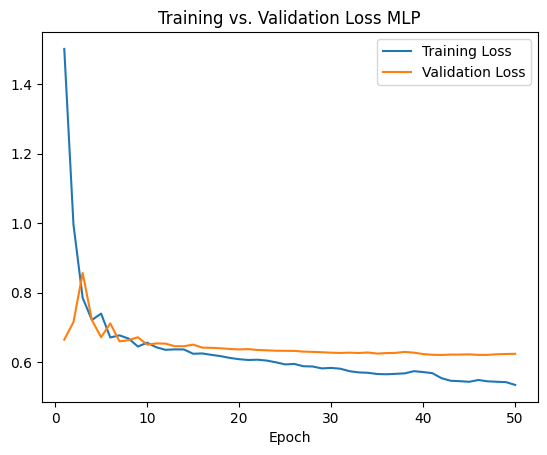

In [20]:
plt.plot(np.arange(1, 51), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss MLP')
plt.xlabel('Epoch')
plt.legend()

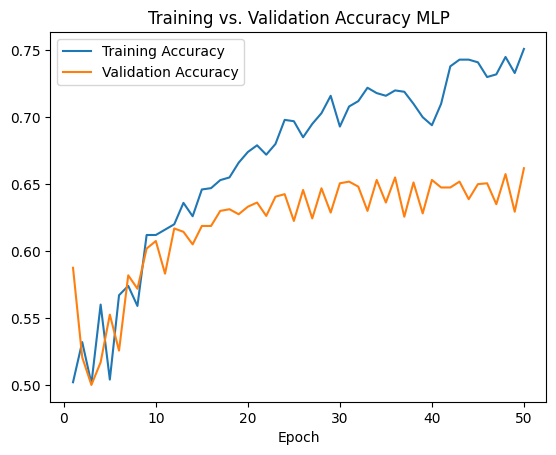

In [101]:
plt.plot(np.arange(1, 51), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 51), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy MLP')
plt.xlabel('Epoch')
plt.legend()

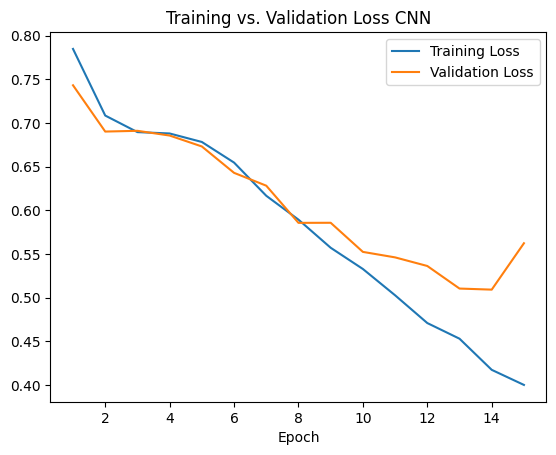

In [99]:
plt.plot(np.arange(1, 16), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 16), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss CNN')
plt.xlabel('Epoch')
plt.legend()

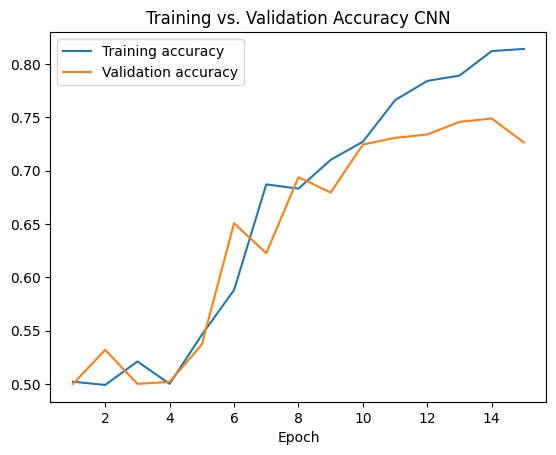

In [100]:
plt.plot(np.arange(1, 16), history_2.history['accuracy'], label='Training accuracy')
plt.plot(np.arange(1, 16), history_2.history['val_accuracy'], label='Validation accuracy')
plt.title('Training vs. Validation Accuracy CNN')
plt.xlabel('Epoch')
plt.legend()


5. Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки. 

In [23]:
from sklearn.metrics import confusion_matrix as cm

In [29]:
y_pred = model_1.predict(test_images)
cm(test_labels, y_pred.round(0))

50/50 [==============================] - 0s 6ms/step


array([[604, 196],
       [345, 455]])

In [30]:
y_pred = model_2.predict(test_images)
cm(test_labels, y_pred.round(0))

50/50 [==============================] - 1s 6ms/step


array([[762,  38],
       [400, 400]])

6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

In [31]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [32]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

50/50 [==============================] - 0s 4ms/step


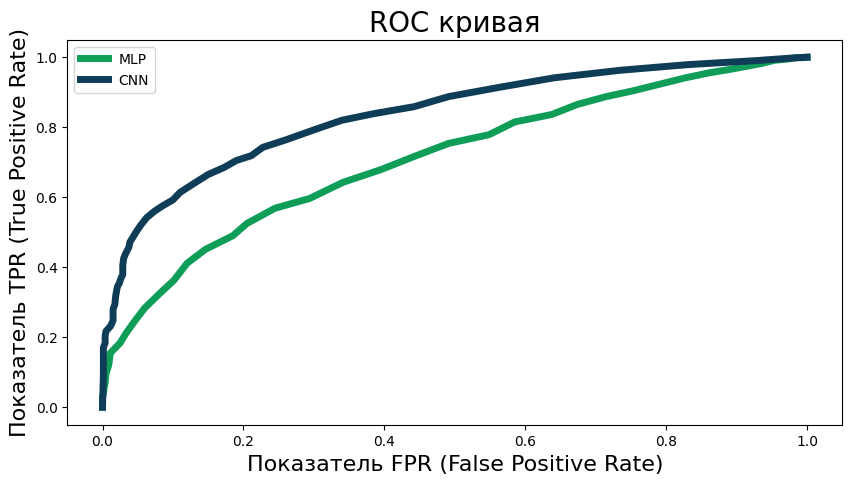

In [34]:
prediction1 = model_1.predict(test_images)
prediction2 = model_2.predict(test_images)

plt.figure(figsize=(10,5))

ROC1 = roc_from_scratch(prediction1.reshape(-1), test_labels,partitions=50)
ROC2 = roc_from_scratch(prediction2.reshape(-1), test_labels,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC1[:,0],ROC1[:,1],color='#0F9D58',lw=5, label='MLP')
plt.plot(ROC2[:,0],ROC2[:,1],color='#0F3D58',lw=5, label='CNN')
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);
plt.legend()

In [35]:
def rocauc(x, y):
  yroc = y[np.argsort(x)]
  xroc = np.sort(x)
  sum = 0
  cur = (0, 0)
  for xi, yi in zip(xroc, yroc):
    sum += (xi -cur[0]) * (cur[1] + yi) / 2
    cur = (xi, yi)
  print('AUC ROC = ', sum) 

In [36]:
print('ROC AUC MLP: ', end='')
rocauc(ROC1[:,0], ROC1[:,1])
print('ROC AUC CNN: ', end='')
rocauc(ROC2[:,0], ROC2[:,1])

ROC AUC MLP: AUC ROC =  0.7101148437500001
ROC AUC CNN: AUC ROC =  0.8348796875000001


7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). 


In [37]:
df_train1 = df_train[df_train['label'].isin([1, 3, 5])]
df_test1 = df_test[df_test['label'].isin([1, 3, 5])]

df_train1.shape, df_test1.shape

((1500, 2), (2400, 2))

In [38]:
train_labels = df_train1['label'].to_numpy(dtype=np.float32)
test_labels = df_test1['label'].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train1.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test1.shape[0],96,96,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train1.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test1.iloc[idx]['image']))
    
train_images /= 255
test_images /= 255

train_images.shape, test_images.shape

((1500, 96, 96, 3), (2400, 96, 96, 3))

In [41]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [59]:
enc = ohe()
y_train = enc.fit_transform(train_labels.reshape(-1, 1)).toarray()
y_test = enc.transform(test_labels.reshape(-1, 1)).toarray()
y_train.dtype

dtype('float64')

In [60]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history_3 = model_1.fit(
    train_images,
    y_train,
    epochs=50,
    batch_size=256,
    validation_data=(test_images, y_test)
)

Epoch 1/50
6/6 [==============================] - 2s 213ms/step - loss: 1.4619 - accuracy: 0.3293 - val_loss: 1.2273 - val_accuracy: 0.3338
Epoch 2/50
6/6 [==============================] - 0s 86ms/step - loss: 1.1433 - accuracy: 0.3487 - val_loss: 1.1109 - val_accuracy: 0.3542
Epoch 3/50
6/6 [==============================] - 0s 58ms/step - loss: 1.1047 - accuracy: 0.3493 - val_loss: 1.0875 - val_accuracy: 0.3629
Epoch 4/50
6/6 [==============================] - 0s 57ms/step - loss: 1.0824 - accuracy: 0.3767 - val_loss: 1.0759 - val_accuracy: 0.4133
Epoch 5/50
6/6 [==============================] - 0s 85ms/step - loss: 1.0677 - accuracy: 0.4187 - val_loss: 1.0705 - val_accuracy: 0.4325
Epoch 6/50
6/6 [==============================] - 0s 88ms/step - loss: 1.0612 - accuracy: 0.4333 - val_loss: 1.0660 - val_accuracy: 0.4200
Epoch 7/50
6/6 [==============================] - 0s 58ms/step - loss: 1.0540 - accuracy: 0.4340 - val_loss: 1.0626 - val_accuracy: 0.4308
Epoch 8/50
6/6 [==========

In [70]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_4 = model_2.fit(
    train_images,
    y_train,
    epochs=30,
    batch_size=256,
    validation_data=(test_images, y_test))

Epoch 1/30
6/6 [==============================] - 3s 229ms/step - loss: 1.2882 - accuracy: 0.3533 - val_loss: 1.1259 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 0s 81ms/step - loss: 1.0987 - accuracy: 0.3740 - val_loss: 1.0935 - val_accuracy: 0.4008
Epoch 3/30
6/6 [==============================] - 0s 74ms/step - loss: 1.0849 - accuracy: 0.3833 - val_loss: 1.0845 - val_accuracy: 0.3421
Epoch 4/30
6/6 [==============================] - 0s 81ms/step - loss: 1.0692 - accuracy: 0.3993 - val_loss: 1.0659 - val_accuracy: 0.4546
Epoch 5/30
6/6 [==============================] - 0s 73ms/step - loss: 1.0292 - accuracy: 0.5247 - val_loss: 1.0354 - val_accuracy: 0.4558
Epoch 6/30
6/6 [==============================] - 1s 99ms/step - loss: 0.9778 - accuracy: 0.5413 - val_loss: 0.9881 - val_accuracy: 0.5267
Epoch 7/30
6/6 [==============================] - 0s 91ms/step - loss: 0.9207 - accuracy: 0.5787 - val_loss: 0.9685 - val_accuracy: 0.5179
Epoch 8/30
6/6 [==========

8. Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки. 


In [89]:
y_pred = model_1.predict(test_images)
pred=(np.argmax(y_pred, axis=1) + 1) * 2 - 1

75/75 [==============================] - 0s 3ms/step


In [90]:
cm(pred, test_labels)

array([[427, 162, 247],
       [237, 449, 299],
       [136, 189, 254]])

In [91]:
y_pred = model_2.predict(test_images)
pred=(np.argmax(y_pred, axis=1) + 1) * 2 - 1

75/75 [==============================] - 0s 4ms/step


In [92]:
cm(pred, test_labels)

array([[546, 185, 242],
       [144, 451, 212],
       [110, 164, 346]])


9. Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


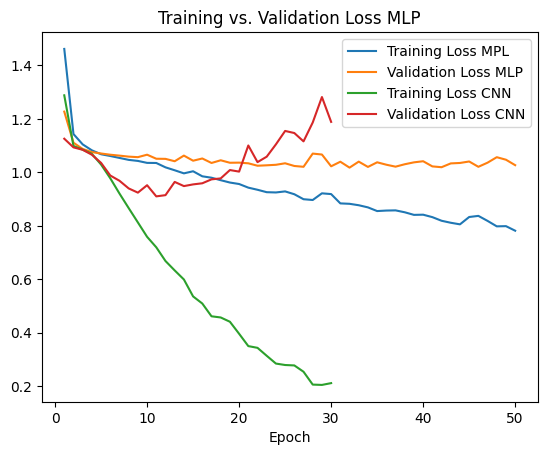

In [94]:
plt.plot(np.arange(1, 51), history_3.history['loss'], label='Training Loss MPL')
plt.plot(np.arange(1, 51), history_3.history['val_loss'], label='Validation Loss MLP')
plt.plot(np.arange(1, 31), history_4.history['loss'], label='Training Loss CNN')
plt.plot(np.arange(1, 31), history_4.history['val_loss'], label='Validation Loss CNN')
plt.title('Training vs. Validation Loss MLP')
plt.xlabel('Epoch')
plt.legend()

CNN очевидно переобучилась

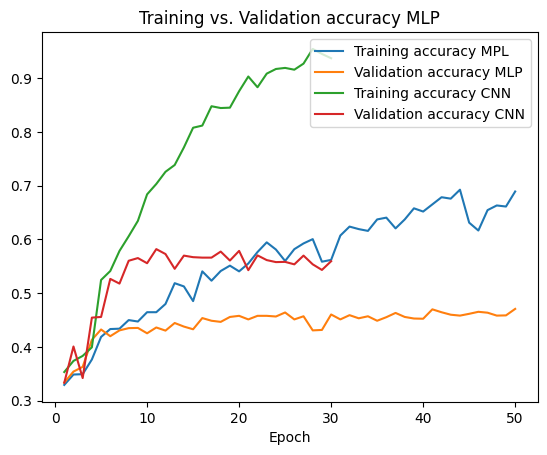

In [102]:
plt.plot(np.arange(1, 51), history_3.history['accuracy'], label='Training accuracy MPL')
plt.plot(np.arange(1, 51), history_3.history['val_accuracy'], label='Validation accuracy MLP')
plt.plot(np.arange(1, 31), history_4.history['accuracy'], label='Training accuracy CNN')
plt.plot(np.arange(1, 31), history_4.history['val_accuracy'], label='Validation accuracy CNN')
plt.title('Training vs. Validation accuracy MLP')
plt.xlabel('Epoch')
plt.legend()